In [1]:
# !pip install numpy==1.25.0

In [3]:
import numpy as np
# must be lower than 1.26.x
np.version.version

'1.25.0'

In [1]:
!gcc --version
!gfortran --version

# must be 3.11.9 or lower
!python --version

gcc (MinGW-W64 x86_64-ucrt-posix-seh, built by Brecht Sanders, r3) 14.1.0
Copyright (C) 2024 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

GNU Fortran (MinGW-W64 x86_64-ucrt-posix-seh, built by Brecht Sanders, r3) 14.1.0
Copyright (C) 2024 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.12.4


In [3]:
!f2py -c src/BDREF.f src/DISORT.f src/ERRPACK.f src/LINPAK.f src/RDI1MACH.f src/GETMOM.f src/PRTFIN.f src/DRIVER.f -m disort --quiet

{'before': '', 'this': 'intent', 'after': '(in)   :: iphas, gg,'}
WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


rmbadname1: Replacing "float" with "float_bn".
rmbadname1: Replacing "len" with "len_bn".
rmbadname1: Replacing "max" with "max_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "max" with "max_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "float" with "float_bn".
rmbadname1: Replacing "max" with "max_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "max" with "max_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "max" with "max_bn".
rmbadname1: Replacing "min" with "min_bn".
rmbadname1: Replacing "float" with "float_bn".
rmbadname1: Replacing "index" with "index_bn".
C:\Users\underhamster\miniconda3\envs\py311\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
   

In [1]:
import disort

In [4]:
if __name__ == '__main__':
# if True:
    uTau   = np.array([0.,1.])
    phi    = np.array([0.,60.,120.])
    fbeam  = 1.
    umu0   = 1./np.sqrt(2.)
    phi0   = 0.0
    albedo = 0.1
    umu    = np.array([-1.,-0.5,0.5,1.])
    
    # dTau   = np.ones(50)*1./50
    # w0     = np.ones(50)*1.
    # iphas  = np.ones(50,dtype='int')*2
    # gg     = np.ones(50)*0.85

    # [rfldir, rfldn, flup, dfdt, uavg, uu, albmed, trnmed] =\
    #                                 disort.run(dTau, w0=w0, iphas=iphas, gg=gg,
    #                                            umu0=umu0, phi0=phi0, albedo=albedo, fbeam=fbeam,
    #                                            utau=uTau, umu=umu, phi=phi)

    # CASE IMPLEMENTED IN run_disort.f
    temper =  np.array([300, 300, 300, 300, 300, 300, 300])
    dTau  = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0])
    iphas = np.array([2, 2, 2, 3, 2, 2])
    w0    = np.array([0.5, 0.5, 0.5, 0.899999976, 0.5, 0.5])
    N = len(dTau)
    gg     = np.ones(N)*0.85
    prnt   = np.array([True, True, True, False, True])

    [rfldir, rfldn, flup, dfdt, uavg, uu, albmed, trnmed] =\
                                    disort.run(dtauc=dTau, ssalb=w0, iphas=iphas, gg=gg,
                                                umu0=umu0, phi0=phi0, albedo=albedo, fbeam=fbeam,
                                                usrtau=True, utau=uTau, usrang=True, umu=umu,
                                                phi=phi, nstr=32, maxmom=299, lamber=True,
                                                onlyfl=False, accur=0., plank=False,
                                                temper=temper, wvnmlo=999., wvnmhi=1000.,
                                                ibcnd=0, fisot=0., btemp=300., ttemp=300.,
                                                temis=1., prnt=prnt)


# Energy conservation, R(TOA)+T(BOA)*(1-albedo) ~ 1:  1.000


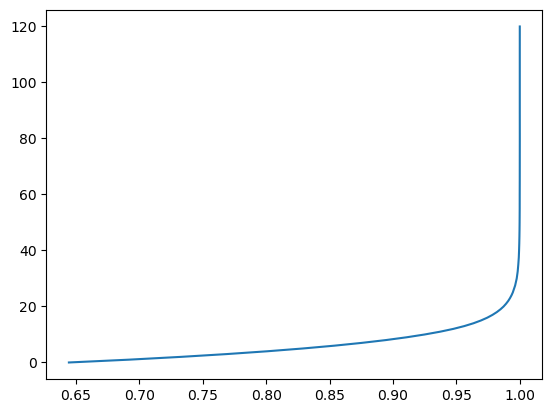

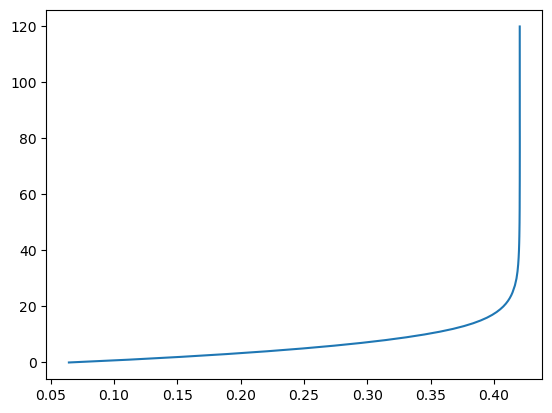

In [5]:
import os
import matplotlib.pyplot as plt
##########################################################################################################

if __name__ == '__main__':

    cwd = os.getcwd()
    # read Rayleigh optical thickness for 325.8 nm [Ozone fitting window]
    xy     = np.loadtxt(os.path.join(cwd, '', 'src/rayleigh_layer_opd.txt'))
    dTau   = xy[::-1,1]  # FROM TOP TO BOTTOM
    z_atm  = xy[::-1,0]  # last altitude value missing, find in header
    z_atm  = np.insert(z_atm, 0, 120.)

    N_tau  = len(dTau)
    w0     = np.ones(N_tau)*1.
    iphas  = np.ones(N_tau,dtype='int')*2
    gg     = np.zeros(N_tau)
    temper = np.ones(N_tau+1)*1000
    cumTau = np.hstack([0.,dTau.cumsum()])
    uTau   = cumTau
    phi    = np.array([0.,60.,120.])
    umu0   = 1./np.sqrt(2.)
    fbeam  = 1./umu0  # Ensures fluxes to be normalized to one
    phi0   = 0.0
    albedo = 0.1
    umu    = np.array([-1.,-0.5,0.5,1.])
    prnt   = np.array([True, True, True, False, True])

    [rfldir, rfldn, flup, dfdt, uavg, uu, albmed, trnmed] =\
                                      disort.run(dtauc=dTau, ssalb=w0, iphas=iphas, gg=gg,
                                                 umu0=umu0, phi0=phi0, albedo=albedo, fbeam=fbeam,
                                                 utau=uTau, umu=umu, phi=phi, prnt=prnt, usrtau=True, usrang=True, nstr=32, 
                                                 maxmom=299, lamber=True,
                                                 onlyfl=False, accur=0., plank=False,
                                                 temper=temper, wvnmlo=999., wvnmhi=1000.,
                                                 ibcnd=0, fisot=0., btemp=300., ttemp=300.,
                                                 temis=1.)

    rfltot = rfldir + rfldn
    print('\n# Energy conservation, R(TOA)+T(BOA)*(1-albedo) ~ 1:  %.3f' % (flup[0] + rfltot[-1]*(1.-albedo)))

    plt.figure()
    plt.plot(rfltot, z_atm)

    plt.figure()
    plt.plot(flup, z_atm)

In [6]:
print(len(cumTau))

50
